In [1]:
#Import libraries
import pandas as pd

#Read the dataset
df = pd.read_csv("Netflix_shows_movies.csv")

#Check the number of missing values before cleaning
print("Missing values before cleaning:")
print(df.isna().sum())

#Clean missing values according to the strategy
# - director, cast, country -> fill with "Unknown"
# - date_added -> fill with mode (most frequent value)
# - rating -> fill with "Not Rated"

df.loc[:, "director"] = df["director"].fillna("Unknown")
df.loc[:, "cast"] = df["cast"].fillna("Unknown")
df.loc[:, "country"] = df["country"].fillna("Unknown")

most_common_date = df["date_added"].mode()[0]
df.loc[:, "date_added"] = df["date_added"].fillna(most_common_date)

df.loc[:, "rating"] = df["rating"].fillna("Not Rated")

#Ensure there are no remaining missing values
print("\nMissing values after cleaning:")
print(df.isna().sum())

#Save the cleaned data to a new CSV file
df.to_csv("Netflix_shows_movies_clean.csv", index=False)

print("\n✅ Data has been cleaned and saved as 'Netflix_shows_movies_clean.csv'")

Missing values before cleaning:
show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

Missing values after cleaning:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

✅ Data has been cleaned and saved as 'Netflix_shows_movies_clean.csv'


In [2]:
#View the structure & summary of the data
print("==== Dataset size (rows, columns) ====")
display(df.shape)

print("\n==== Column names & data types ====")
df.info()

print("\n==== First 5 rows of the dataset ====")
display(df.head())

#Statistical description
print("\n==== Statistics for numeric columns ====")
display(df.describe())

print("\n==== Statistics for categorical / object columns ====")
display(df.describe(include='object'))

==== Dataset size (rows, columns) ====


(6234, 12)


==== Column names & data types ====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      6234 non-null   object
 4   cast          6234 non-null   object
 5   country       6234 non-null   object
 6   date_added    6234 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6234 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB

==== First 5 rows of the dataset ====


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,Unknown,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,Unknown,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,Unknown,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...



==== Statistics for numeric columns ====


,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000



==== Statistics for categorical / object columns ====


,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,6234,6234,6234,6234,6234,6234,6234,6234,6234,6234
unique,2,6172,3302,5470,555,1524,15,201,461,6226
top,Movie,The Silence,Unknown,Unknown,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,A surly septuagenarian gets another chance at ...
freq,4265,3,1969,570,2032,133,2027,1321,299,3


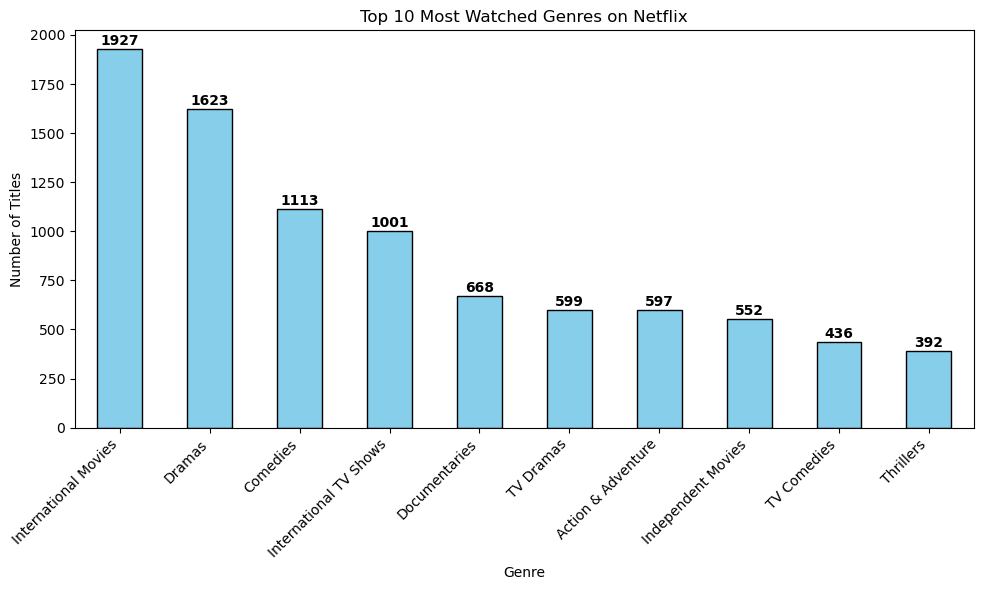

In [3]:
import matplotlib.pyplot as plt

#Count the genres
genres = df['listed_in'].str.split(', ')
genres_exploded = genres.explode()
genre_counts = genres_exploded.value_counts().head(10)  # take the top 10

#Visualization with numbers
plt.figure(figsize=(10,6))
bars = genre_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Top 10 Most Watched Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')

#Add numbers above each bar
for i, value in enumerate(genre_counts):
    plt.text(i, value + 5, str(value), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

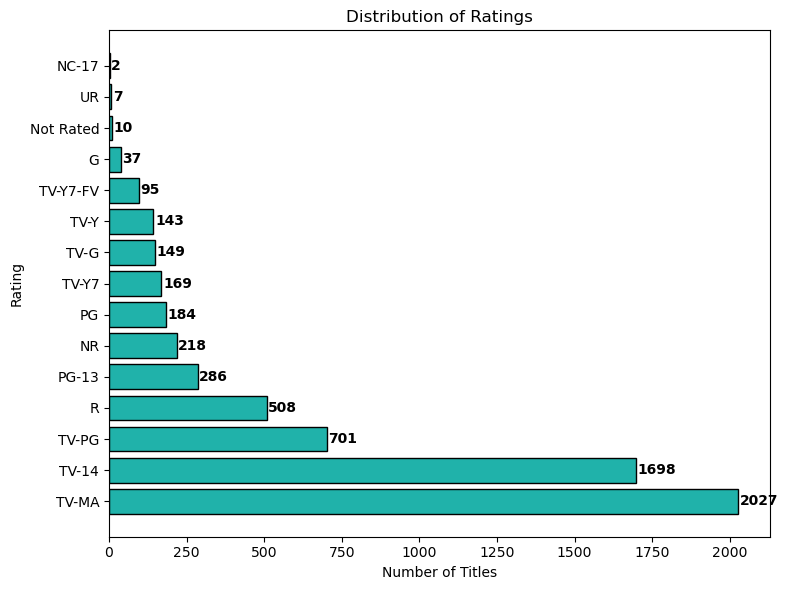

In [4]:
import matplotlib.pyplot as plt

#Calculate the distribution of ratings
rating_counts = df['rating'].value_counts().sort_values(ascending=False)

#Visualize the rating distribution with a horizontal bar chart
plt.figure(figsize=(8, 6))
bars = plt.barh(rating_counts.index, rating_counts.values,
                color='lightseagreen', edgecolor='black')

plt.title('Distribution of Ratings')
plt.xlabel('Number of Titles')
plt.ylabel('Rating')

#Add numbers at the end of each bar
for bar in bars:
    plt.text(
        bar.get_width() + 5,              
        bar.get_y() + bar.get_height() / 2,  
        str(int(bar.get_width())), 
        va='center',
        fontsize=10,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()